**1. Load libraries and data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv')

# Display the first few rows of the dataset to get an overview
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Exploratory Data Analysis (EDA)**

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<ipython-input-8-acb5b4566f5a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


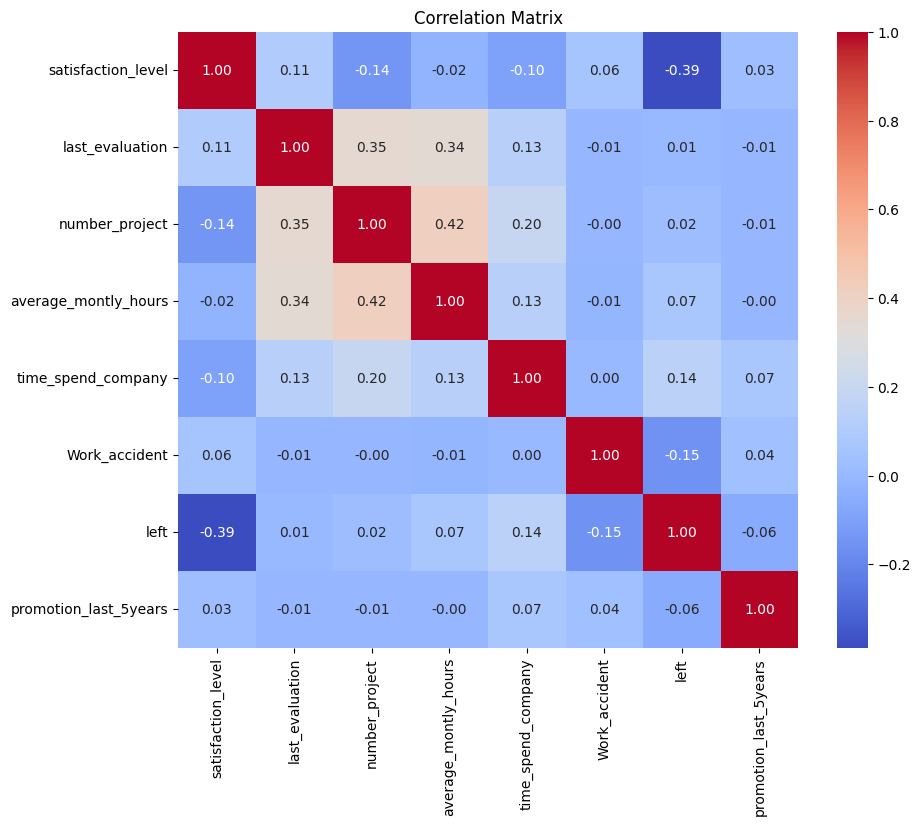

In [ ]:
#Correlation Analysis
# Calculate correlation matrix
correlation_matrix = data.corr()

# Display a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

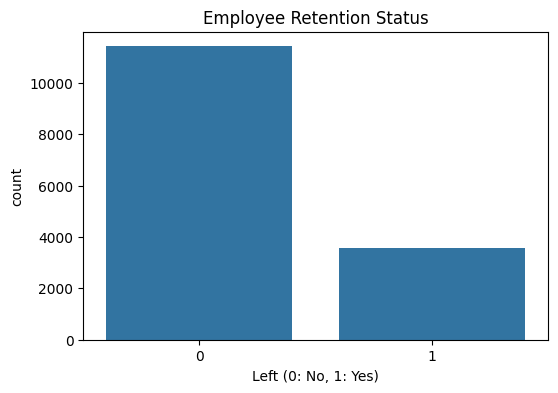

In [ ]:
# Bar plot for 'left' (Employee retention status)
plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=data)  # Change 'df' to 'data'
plt.title('Employee Retention Status')
plt.xlabel('Left (0: No, 1: Yes)')
plt.show()

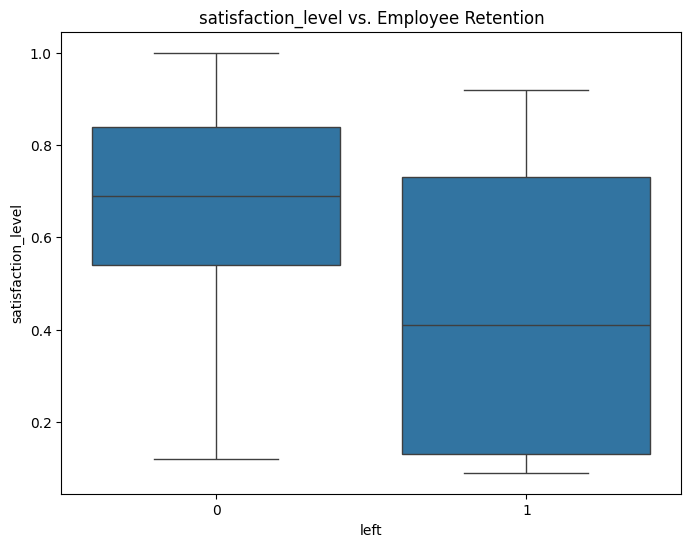

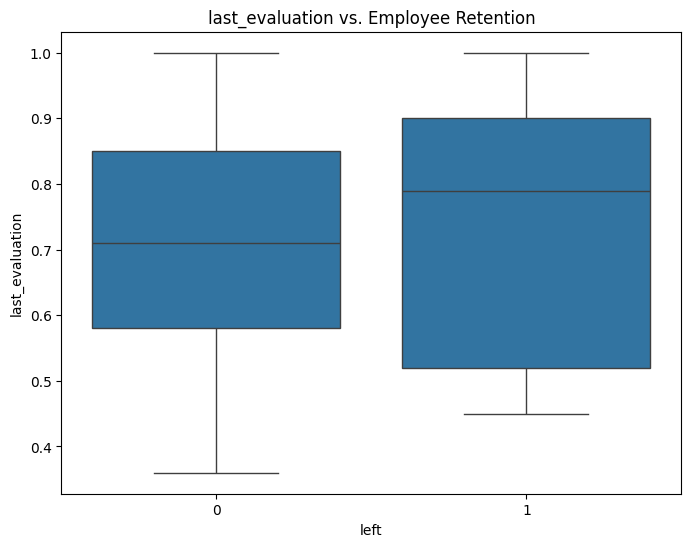

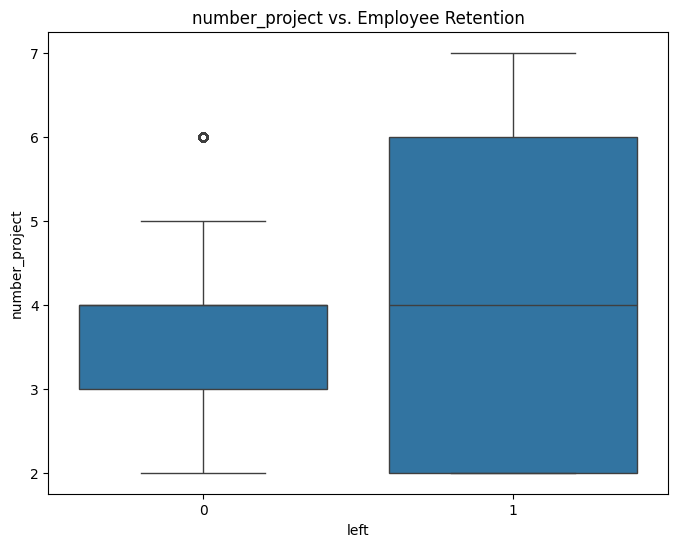

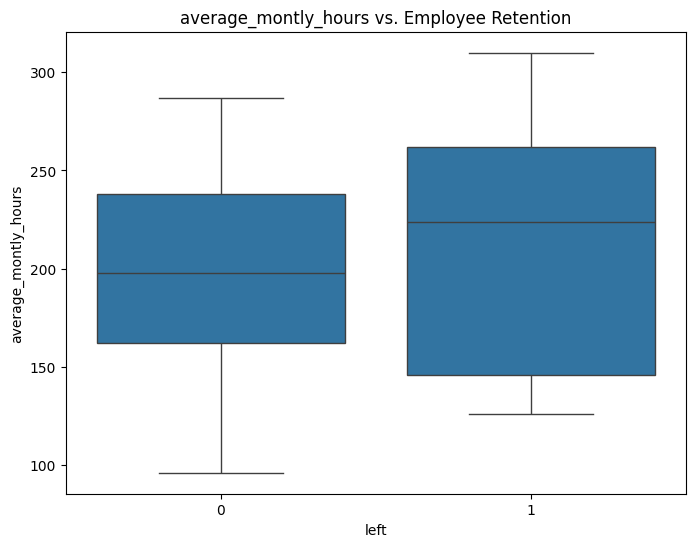

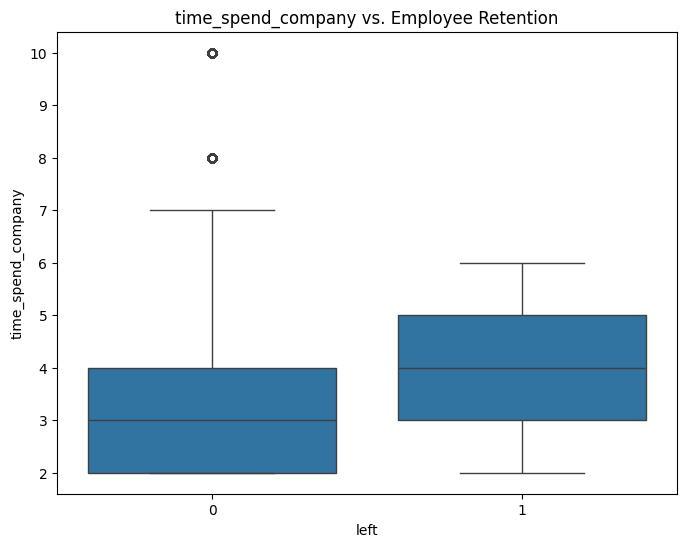

In [ ]:
#Impact of Numerical Features on Employee Retention
# Box plots for numerical features vs. 'left'
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='left', y=feature, data=data)
    plt.title(f'{feature} vs. Employee Retention')
    plt.show()

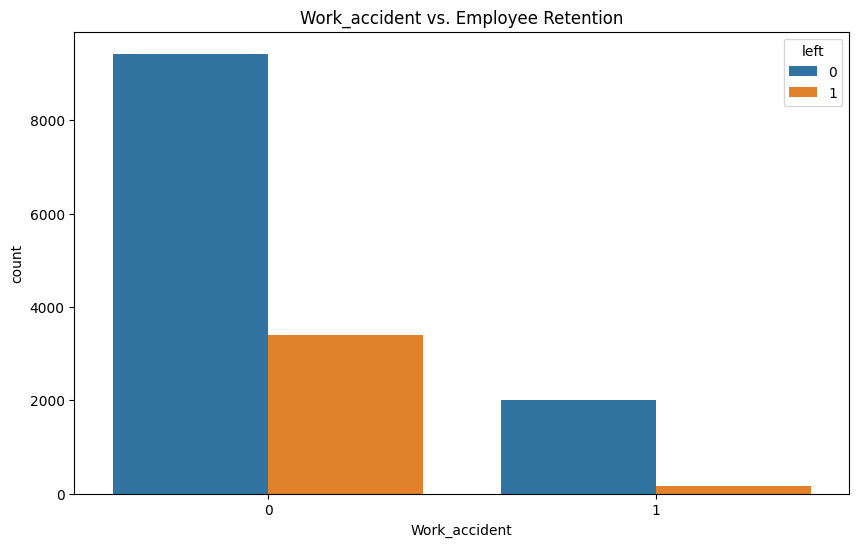

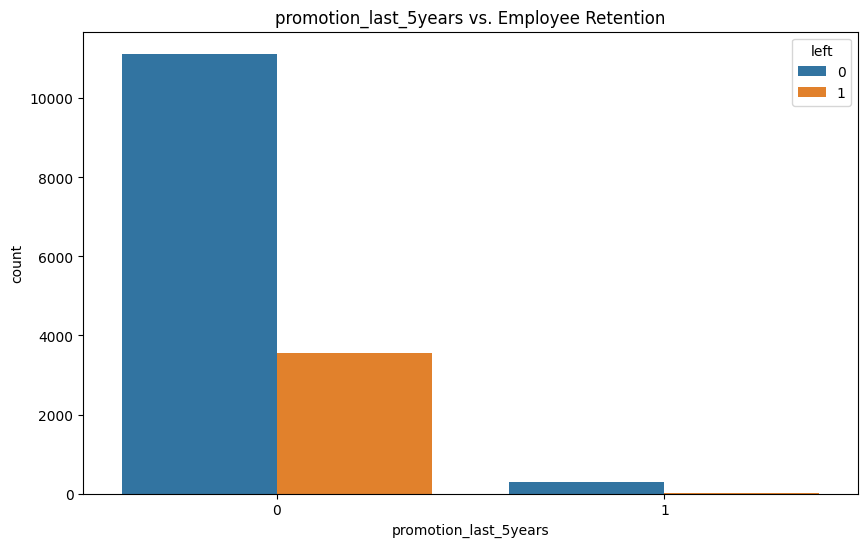

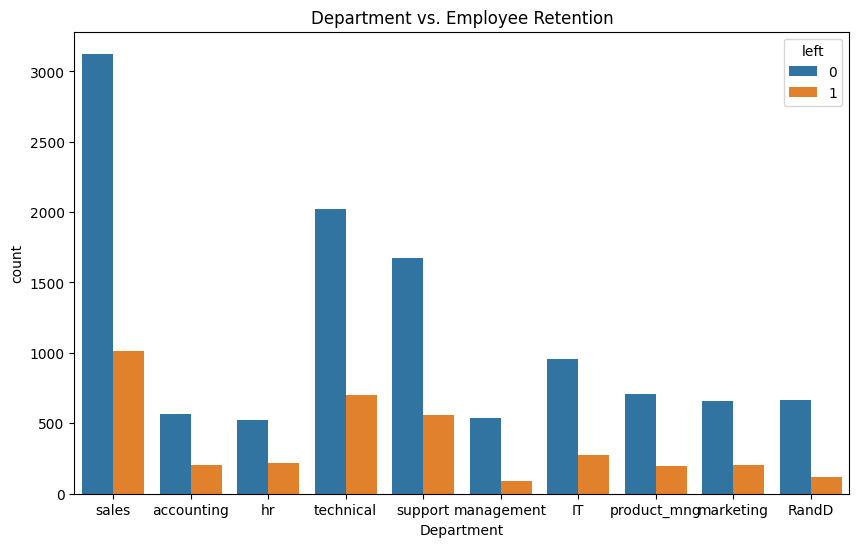

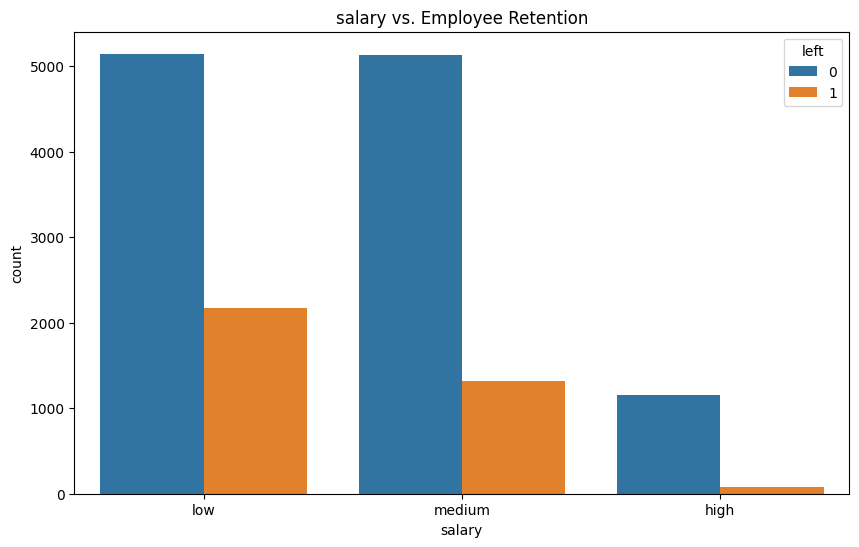

In [ ]:
#Impact of Categorical Features on Employee Retention
# Bar plots for categorical features vs. 'left'
categorical_features = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='left', data=data)
    plt.title(f'{feature} vs. Employee Retention')
    plt.show()

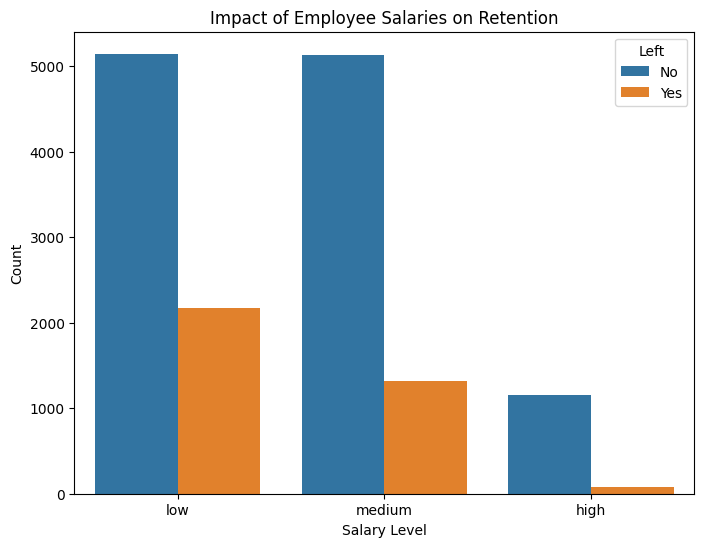

In [ ]:
# Bar plot for the impact of employee salaries on retention
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=data)
plt.title('Impact of Employee Salaries on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', labels=['No', 'Yes'])
plt.show()

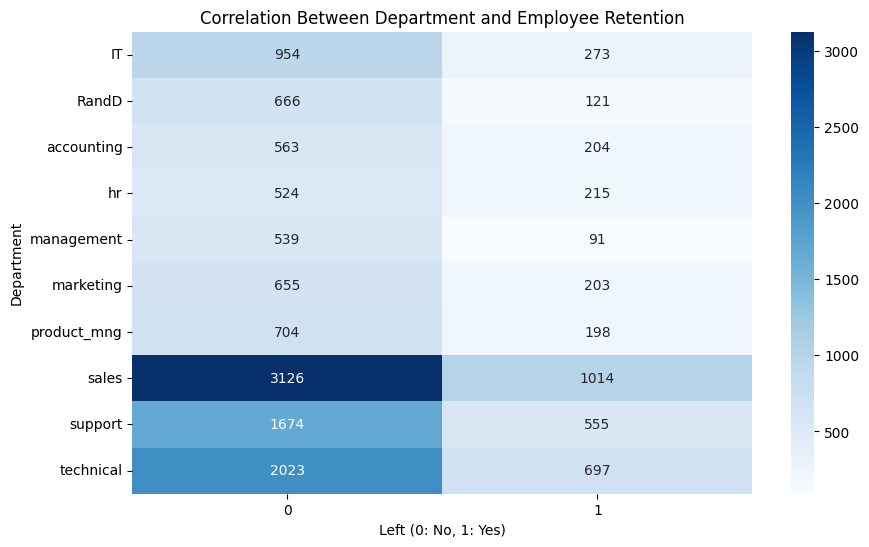

In [ ]:
# Create a cross-tabulation between 'Department' and 'left'
department_retention_cross = pd.crosstab(data['Department'], data['left'])

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(department_retention_cross, annot=True, fmt='d', cmap='Blues')
plt.title('Correlation Between Department and Employee Retention')
plt.xlabel('Left (0: No, 1: Yes)')
plt.ylabel('Department')
plt.show()

In [ ]:
# Dependent Variable (Target):

# left - Employee retention status (0: No, 1: Yes)
# Independent Variables:

# satisfaction_level
# last_evaluation
# number_project
# average_montly_hours
# time_spend_company
# Work_accident
# promotion_last_5years
# Department
# salary

In [ ]:
# Dependent variable (target)
y = data['left']

# Independent variables
X = data.drop('left', axis=1)

In [ ]:
#Split the data into train set and test set
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11999, 9)
X_test shape: (3000, 9)
y_train shape: (11999,)
y_test shape: (3000,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a ColumnTransformer to handle categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']),
        ('cat', OneHotEncoder(), ['Department', 'salary'])
    ])

# Create a pipeline with the preprocessor and Logistic Regression model
logreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train the model on the training set
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
y_pred = logreg_model.predict(X_test)

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.761

Confusion Matrix:
 [[2115  179]
 [ 538  168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      2294
           1       0.48      0.24      0.32       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000

